In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link:
https://archive.ics.uci.edu/ml/datasets/census+income


**Problem Statement:**

In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.


**Tasks To Be Performed:**
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("census-income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#renaming columns
df.rename(columns={'annual_income': 'income'}, inplace=True)

In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **EDA**

In [6]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [7]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

# **Cleaning Dataset**

In [11]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
# Changing the ? present in the dataset to NaN
df=df.replace('?', np.nan)

In [13]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [14]:
# dropping na values
df.dropna(inplace=True)

In [15]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
# Chking duplicates
df.duplicated().sum()

23

use .to_string to find index

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# **Checking for outliers**

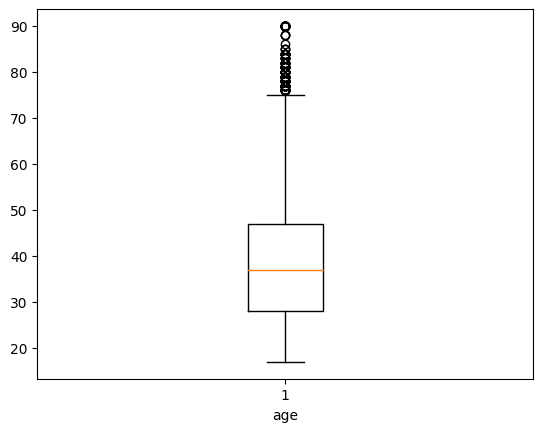

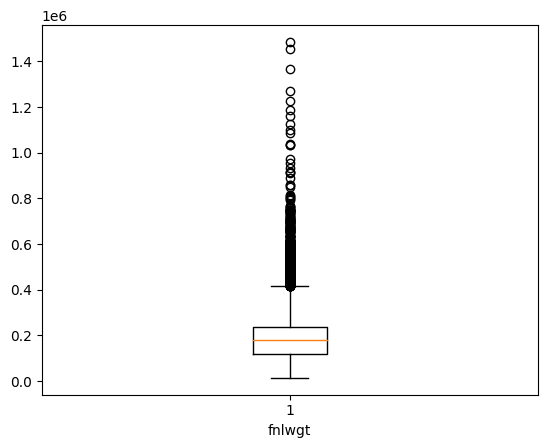

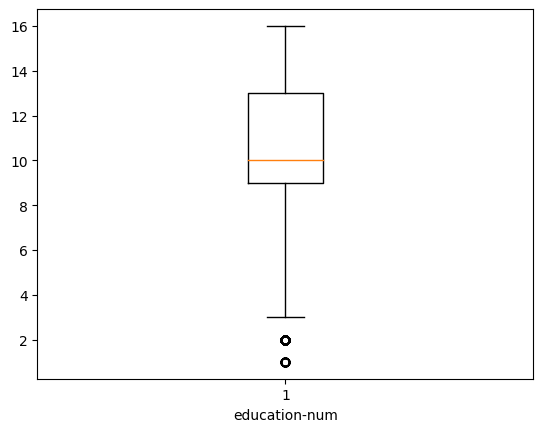

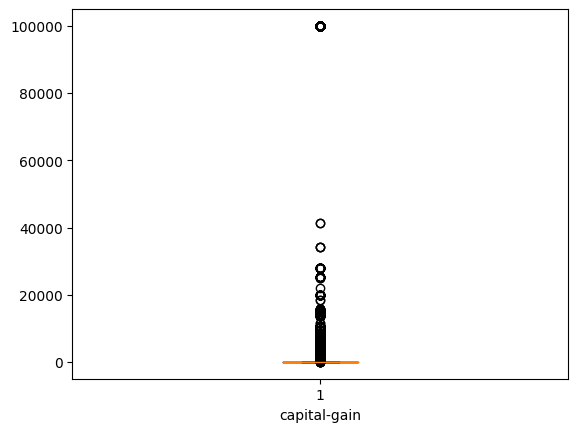

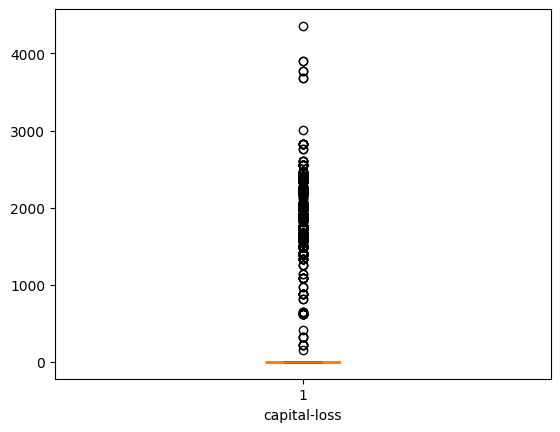

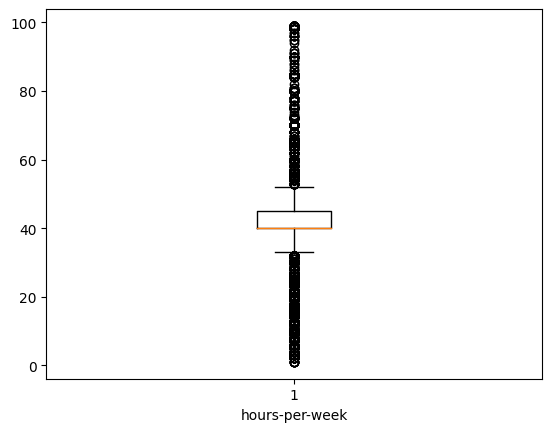

In [18]:
for col in df.columns:
  if(df[col].dtype!='object'):
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

Ignore outlier of capital gain and capital loss (Values of money earned in stock market  - ppl may / maynt invest in stock)

In [19]:
# Making a list of outliers
out = ["hours-per-week","age", "education-num","fnlwgt"]

In [20]:
# Removing
for col in out:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  uw = q3 + 1.5 * iqr
  lw = q1 - 1.5 * iqr
  df = df[(df[col] >= lw) & (df[col] <= uw)]

# **Encoding**

Convert Categorical - Numerical

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

In [24]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


ordinal - assign values as per order

label - can assign randomly


# **Model Building**

In [25]:
x = df.iloc[:,:-1] #independent
y = df.iloc[:,-1]  #target

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

## Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
# Make predictions on the test data
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# 0 income <=50k/year
# 1 income 50k/year

In [29]:
from sklearn.metrics import *
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.781724299796589

In [30]:
confusion_matrix(y_test, y_pred)
# lr_acc

array([[4533,  191],
       [1204,  463]])

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree model
tree_model = DecisionTreeClassifier(max_depth=8)

# Fit the decision tree model on the training data
tree_model.fit(x_train, y_train)

# Make predictions on the test data using the decision tree model
tree_predictions = tree_model.predict(x_test)

# Evaluate the decision tree model's accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Model Accuracy:", tree_accuracy)

print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, tree_predictions))

Decision Tree Model Accuracy: 0.8413393835080583
Confusion Matrix for Decision Tree:
 [[4449  275]
 [ 739  928]]


depth increase - Time for training increase - Complexity will increase

accuracy will decrease

In [32]:
list1=[]
for i in range(1,100):
  dt=DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  list1.append(acc)
  print(i, acc)

print (max(list1))

1 0.7391644500078235
2 0.8153653575340323
3 0.8296041308089501
4 0.8347676419965576
5 0.8335158817086528
6 0.8380535127523079
7 0.8422782037239869
8 0.8399311531841652
9 0.8375841026443436
10 0.8383664528242841
11 0.835237052104522
12 0.8324205914567361
13 0.8288217806290096
14 0.8213112189015803
15 0.8192771084337349
16 0.813644187138163
17 0.8103583163824127
18 0.8050383351588171
19 0.80065717415115
20 0.7997183539352214
21 0.7969018932874354
22 0.7956501329995306
23 0.7962760131434831
24 0.7942419026756377
25 0.7922077922077922
26 0.7945548427476138
27 0.7940854326396495
28 0.7959630730715068
29 0.7951807228915663
30 0.7943983727116257
31 0.7933030824597089
32 0.7936160225316852
33 0.7912689719918635
34 0.7909560319198874
35 0.7933030824597089
36 0.7925207322797684
37 0.791894852135816
38 0.7897042716319824
39 0.7893913315600063
40 0.7878266312001252
41 0.7931466124237209
42 0.791894852135816
43 0.7900172117039587
44 0.7898607416679706
45 0.791894852135816
46 0.787670161164137
47 0.

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
forest_model = RandomForestClassifier(max_depth=8)

# Fit the Random Forest model on the training data
forest_model.fit(x_train, y_train)

# Make predictions on the test data using the Random Forest model
forest_predictions = forest_model.predict(x_test)

# Evaluate the Random Forest model's accuracy
forest_accuracy = accuracy_score(y_test, forest_predictions)
print("Random Forest Model Accuracy:", forest_accuracy)

print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, forest_predictions))

Random Forest Model Accuracy: 0.8450946643717728
Confusion Matrix for Random Forest:
 [[4498  226]
 [ 764  903]]


In [37]:
print(lr_acc, tree_accuracy, forest_accuracy)

0.781724299796589 0.8413393835080583 0.8450946643717728


In [38]:
# Random forest is able to predict ans with highest acc score